In [1]:
from zget_data import get_responses, get_qdetails, page_map, attention, quest_map
import pandas as pd
import json

In [2]:
password_response, time_response, survey_response = get_responses(4)

## Password Analysis

In [3]:
pd.DataFrame(password_response)

,password2,password2_recall1,password2_recall2
0,Hyruletemple99,NaN,NaN
1,Zarta$$750,NaN,NaN
2,!@A1Thompson,NaN,NaN
3,thunder34*&^,NaN,NaN
4,jesse523@#$,NaN,NaN
5,done@1122,NaN,NaN
6,uZH#nAes2S@i,NaN,NaN
7,rr11,NaN,NaN
8,OHIDVQ**t1,NaN,NaN
9,ALICEO*#,NaN,NaN


## Time Analysis

In [4]:
page_time_df = pd.DataFrame(time_response)
page_time_df = page_time_df.sort_index(axis=1, key=lambda x: x.astype(int))
page_time_df = page_time_df.rename(page_map, axis=1)
page_time_df['total (mins)'] = page_time_df.sum(axis=1)/60
page_time_df

,startstudy,fpasssurvey,pagegif,desinint,quest,csquest,motivation,spass,scog,spasssurvey,spassrecall,demo,total (mins)
0,2.932,16.662,7.634,26.971,28.938,120.344,11.044,41.686,5.868,20.811,13.118,43.066,5.651233
1,3.800,21.308,9.621,25.281,84.861,194.497,8.954,75.011,26.266,20.844,7.304,68.166,9.098550
2,5.718,46.093,78.295,7.735,141.381,995.087,8.829,60.258,13.277,57.986,20.534,71.929,25.118700
3,90.234,31.516,25.388,112.763,118.957,312.820,9.312,89.715,29.856,69.382,27.929,83.085,16.682617
4,2.022,8.830,2.789,6.213,28.893,88.750,3.405,35.045,6.293,20.564,9.102,24.742,3.944133
5,6.826,9.440,18.979,84.026,37.552,97.501,11.808,114.439,128.260,63.774,21.132,43.186,10.615383
6,8.597,38.181,23.099,40.140,79.252,230.084,42.276,77.757,48.212,31.413,16.044,54.165,11.487000
7,9.068,16.404,4.461,11.252,39.627,72.699,8.220,20.795,23.330,17.252,7.467,24.867,4.257367
8,5.605,10.854,7.533,25.340,64.813,104.349,9.724,37.500,24.845,20.676,10.624,26.181,5.800733
9,16.611,64.970,8.754,42.113,71.146,202.197,7.744,62.953,59.373,20.539,17.550,136.663,11.843550


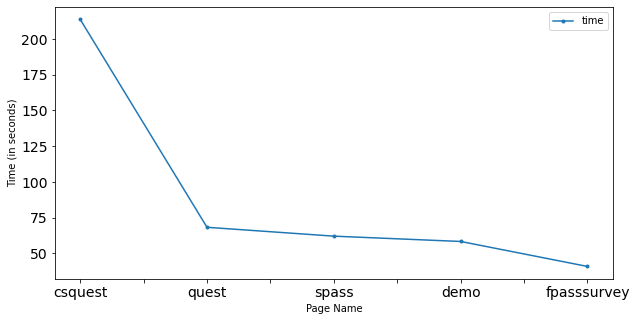

In [5]:
top5 = pd.DataFrame(columns=['page', 'time'])
for i, data in page_time_df.mean().sort_values(ascending=False).head(5).items():
    top5 = top5.append(pd.DataFrame([[i, data]], columns=top5.columns), ignore_index=True)

_ = top5.plot(x='page', y='time', figsize=(10, 5), xlabel="Page Name", ylabel="Time (in seconds)", fontsize=14, style=".-")

## Survey Response Analysis

In [6]:
survey_response_df = pd.DataFrame(survey_response)

### Quest

In [7]:
normqsid = ['1-2', '1-4', '1-7', '1-10', '1-12', '1-13', '1-16']
quest = pd.DataFrame(survey_response_df['7'].to_dict()).astype(int)
quest.drop(attention.get('7'), inplace=True)
normquest = 8 - quest.loc[normqsid]
quest.update(normquest)

new_index = {}
for qsid in quest.index:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('7', qsid).replace("'", '"')).get('elements').get(likert_scale)
new_index
quest = quest.rename(new_index)
quest['mean'] = quest.mean(axis=1)
quest['median'] = quest.median(axis=1)
quest

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,mean,median
organized,7.0,7.0,4.0,6.0,5.0,6.0,6.0,4.0,6.0,6.0,...,7.0,4.0,6.0,6.0,6.0,4.0,6.0,5.0,5.692308,6.000000
well grouped,7.0,7.0,5.0,6.0,5.0,6.0,6.0,4.0,5.0,7.0,...,6.0,3.0,5.0,4.0,7.0,4.0,6.0,5.0,5.538462,5.538462
ordered,7.0,7.0,5.0,7.0,3.0,2.0,7.0,4.0,6.0,6.0,...,7.0,3.0,3.0,6.0,6.0,4.0,6.0,5.0,5.307692,6.000000
beneficial,7.0,7.0,6.0,7.0,6.0,2.0,6.0,4.0,6.0,7.0,...,6.0,6.0,3.0,7.0,7.0,3.0,6.0,5.0,5.538462,6.000000
structured,7.0,7.0,2.0,6.0,4.0,7.0,7.0,5.0,7.0,5.0,...,7.0,5.0,5.0,6.0,6.0,4.0,6.0,5.0,5.615385,6.000000
rewarding,7.0,4.0,5.0,6.0,5.0,1.0,6.0,3.0,4.0,5.0,...,6.0,5.0,2.0,6.0,6.0,2.0,6.0,4.0,4.500000,4.500000
helpful,7.0,7.0,5.0,6.0,6.0,7.0,6.0,4.0,5.0,6.0,...,6.0,5.0,6.0,7.0,7.0,3.0,6.0,4.0,5.500000,6.000000
stylish,5.0,4.0,2.0,6.0,4.0,2.0,5.0,3.0,5.0,5.0,...,7.0,5.0,3.0,4.0,7.0,2.0,3.0,6.0,4.346154,5.000000
appealing,7.0,6.0,5.0,6.0,5.0,6.0,6.0,3.0,6.0,6.0,...,6.0,5.0,5.0,5.0,7.0,5.0,6.0,5.0,5.307692,5.307692
pleasant,7.0,5.0,3.0,6.0,6.0,7.0,2.0,4.0,5.0,7.0,...,5.0,6.0,5.0,6.0,7.0,3.0,6.0,5.0,5.192308,5.000000


In [8]:
cats = {}
for k, v in quest_map.items():
    temp = quest.loc[v]
    cats[k] = temp

for k, v in cats.items():
    print(f'{k}: {v["mean"].mean()}')

Perspicuity: 5.721153846153847
Aesthetics: 4.913461538461538
Usefulness: 5.134615384615385
Clarity: 5.538461538461538


### CSQuest

In [9]:
csquest = pd.DataFrame(survey_response_df['8'].to_dict())

qualindex = ['8-1', '10-1']
csquestqual = csquest.loc[qualindex]
csquestqual

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
8-1,"[Social Media, Email, E-commerce Websites, Cou...","[Social Media, Email, Financial Websites, Gami...","[Social Media, E-commerce Websites, Government...","[Social Media, Email, Financial Websites, Gami...","[Social Media, Gaming Websites]","[Social Media, Financial Websites, E-commerce ...","[Email, Financial Websites]",[None of the above],"[Social Media, Email, Financial Websites, Gove...","[Social Media, Email, Financial Websites, E-co...",...,"[Email, Financial Websites, E-commerce Website...","[Social Media, Course Management Websites, e.g...","[Social Media, Email, Gaming Websites, E-comme...",[None of the above],"[Social Media, Financial Websites]","[Social Media, Email, Gaming Websites, Course ...","[Social Media, Email]","[Course Management Websites, e.g. Canvas, Blac...","[Social Media, Email, Financial Websites, Gami...","[Social Media, Email, Financial Websites, Gove..."
10-1,Clean style with a very straight to the point ...,The part where it takes over the account and s...,The last part of the design motivated me to cr...,third part of design make me to create strong ...,that hacking system i would like to protect th...,google password,The people whose e-mail addresses I have in my...,Nothing,The third one where the coworkers and CEO get ...,A strong password should contain different typ...,...,The part where the hacker sends a virus to eve...,"This does not motivate me, I already know the ...",the last part is really motivates me because i...,hacker's image,i used strong password to used for my personal...,The coworkers calling me out by name makes me ...,I would put a strong password in case someone ...,The part where the coworkers start to blame Al...,The part where the hacker sends out the virus ...,The second part motives me most to create a st...


In [10]:
csquestquant = csquest.drop(qualindex).fillna(0).astype(int)
csquestquant.drop(attention.get('8'), inplace=True)

normqsid = []
normcsquestquant = 8 - csquestquant.loc[normqsid]
csquestquant.update(normquest)

new_index = {}
for qsid in csquestquant.index:
    new_index[qsid] = json.loads(get_qdetails('8', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
csquestquant = csquestquant.rename(new_index)
csquestquant['mean'] = csquestquant.mean(axis=1)
csquestquant['median'] = csquestquant.median(axis=1)

csquestquant

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,mean,median
portrayal of hacker stimulates,7.0,7.0,7.0,7.0,5.0,6.0,7.0,3.0,6.0,5.0,...,6.0,6.0,5.0,7.0,5.0,3.0,7.0,5.0,5.576923,6.0
portrayal of victim encourages,7.0,7.0,7.0,7.0,5.0,6.0,7.0,3.0,6.0,6.0,...,6.0,6.0,5.0,7.0,6.0,2.0,6.0,5.0,5.384615,6.0
Makes me worried,6.0,5.0,7.0,3.0,4.0,7.0,5.0,3.0,5.0,5.0,...,6.0,4.0,4.0,7.0,5.0,4.0,5.0,4.0,4.846154,5.0
Encourages me to create a strong password,6.0,7.0,7.0,7.0,5.0,6.0,6.0,4.0,7.0,6.0,...,4.0,3.0,5.0,7.0,7.0,3.0,7.0,6.0,5.653846,6.0
Makes me feel emotionally connected to the presented scenario,5.0,1.0,7.0,7.0,5.0,7.0,6.0,2.0,4.0,5.0,...,5.0,6.0,6.0,7.0,6.0,2.0,5.0,4.0,4.807692,5.0
Makes me feel personally connected to the presented scenario,6.0,5.0,7.0,6.0,4.0,6.0,6.0,2.0,5.0,6.0,...,6.0,6.0,5.0,7.0,7.0,2.0,5.0,4.0,4.923077,5.0
easy to follow,7.0,7.0,5.0,6.0,6.0,7.0,7.0,4.0,7.0,5.0,...,6.0,5.0,5.0,7.0,5.0,3.0,7.0,5.0,5.807692,6.0
Novel,6.0,4.0,4.0,6.0,5.0,7.0,3.0,3.0,6.0,5.0,...,7.0,3.0,5.0,6.0,3.0,4.0,6.0,6.0,4.884615,5.0
To the Point,7.0,7.0,4.0,7.0,5.0,6.0,7.0,4.0,5.0,6.0,...,6.0,5.0,6.0,7.0,6.0,2.0,7.0,5.0,5.692308,6.0
Engaging,7.0,7.0,3.0,6.0,5.0,2.0,7.0,3.0,6.0,7.0,...,6.0,6.0,5.0,7.0,7.0,2.0,6.0,5.0,5.538462,6.0


### First Password Survey

In [11]:
normqsid = []
fpass = pd.DataFrame(survey_response_df['3'].to_dict()).astype(int)
normfpass = 8 - fpass.loc[normqsid]
fpass.update(normfpass)
fpass

new_index = {}
for qsid in fpass.index:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('3', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
fpass = fpass.rename(new_index)
fpass['mean'] = fpass.mean(axis=1)
fpass['median'] = fpass.median(axis=1)
fpass

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,mean,median
"I do not change my passwords, unless I have to.",4,3,7,7,5,6,6,5,2,6,...,4,6,6,7,4,7,2,4,5.192308,5.192308
I use different passwords for different online accounts that I have.,5,7,6,7,6,7,7,7,7,6,...,6,6,5,4,7,4,7,6,5.653846,6.000000
"When I create a new online account, I try to use a password that goes beyond the site’s minimum requirements.",4,5,7,7,4,6,1,5,6,7,...,5,6,5,1,5,3,6,6,4.653846,5.000000
I do not include special characters in my password if it’s not required.,7,1,6,1,5,7,7,3,1,4,...,1,4,6,3,2,1,2,2,3.846154,3.846154


### Second Password Survey

In [12]:
normqsid = []
spass = pd.DataFrame(survey_response_df['12'].to_dict()).astype(int)
spass.drop(attention.get('12'), inplace=True)
normspass = 8 - spass.loc[normqsid]
spass.update(normspass)

new_index = {}
for qsid in spass.index:
    # likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('12', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
spass = spass.rename(new_index)
spass['mean'] = spass.mean(axis=1)
spass['median'] = spass.median(axis=1)
spass

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,mean,median
strength of password,5,7,7,7,4,7,7,3,7,7,...,7,3,4,2,7,6,7,6,5.538462,6.000000
motivated after going through design,6,7,7,7,6,6,7,2,6,6,...,6,6,6,4,6,7,7,6,5.769231,6.000000
Hard to remember,4,1,6,7,4,7,7,2,6,6,...,2,3,5,5,7,1,3,5,4.230769,4.230769
Can be easily guessed by a hacker,4,1,3,1,5,6,1,3,2,7,...,1,2,2,4,6,3,1,2,3.000000,3.000000
Can be easily guessed by my close friends or family members,1,1,3,6,5,7,1,1,2,5,...,1,2,2,2,6,1,1,2,2.730769,2.000000
Stronger than the passwords I usually use,6,4,7,7,4,6,7,1,4,6,...,6,2,6,4,5,4,4,3,4.615385,4.615385


### Demographics

In [13]:
demo = pd.DataFrame(survey_response_df['14'].to_dict())

new_index = {}
for qsid in demo.index:
    new_index[qsid] = get_qdetails('14', qsid).split('\n')[0]

demo = demo.rename(new_index).transpose()
demo


,What is your gender?,What is your age range?,What is your race?,What is your highest achieved education level?,What is the primary field of your education?,Which of the following best describes your primary occupation?,Which of the following best describes your experience in computer and technology related fields?,Which of the following best describes your experience in cybersecurity?
0,Man,30-34 years old,[Asian],Four-year College Degree,"Computer Science/Engineering, and Information ...",Business or industry,Formal training,Formal training
1,Woman,45-49 years old,[White],High School Graduate,N/A,Business or industry,Self-taught,Training from Work
2,Woman,25-29 years old,"[White, Hispanic or Latino]",Four-year College Degree,"Computer Science/Engineering, and Information ...",Business or industry,Pursuing or completed a degree,Hold or held a work position
3,Woman,30-34 years old,[White],Four-year College Degree,"Economics, Humanities and Social Sciences",Business or industry,Formal training,Formal training
4,Man,30-34 years old,[White],Four-year College Degree,"Medicine, Nursing, and Health Sciences",Educational institution,Self-taught,Self-taught
5,Man,25-29 years old,[White],Graduate degree (MS/Doctorate),"Computer Science/Engineering, and Information ...",Government,Self-taught,No experience
6,Man,45-49 years old,[White],High School Graduate,"Computer Science/Engineering, and Information ...",Business or industry,Self-taught,Self-taught
7,Man,40-44 years old,[White],High School Graduate,I prefer not to answer,I prefer not to answer,Self-taught,Self-taught
8,Man,25-29 years old,[White],Two-year College Degree,"Economics, Humanities and Social Sciences",Business or industry,Self-taught,Self-taught
9,Man,55-59 years old,[White],Four-year College Degree,"Computer Science/Engineering, and Information ...",IT,Telecommunication,Customer excutive


In [14]:
demo['What is your gender?'].value_counts()

Man      14
Woman    12
Name: What is your gender?, dtype: int64